# <span style="color:lightgreen">ISB AMPBA 2024 Winter - Term 2</span>
# <span style="color:lightgreen">Machine Learning - Unsupervised Learning 2 - Group Assignment Solutions</span>

### <span style="color:lightgreen">By Group 1 :</span>
### <span style="color:lightgreen">Prashant Sharma (PGID - 12310016)</span>
### <span style="color:lightgreen">Rajat Gupta (PGID - 12310017)</span>
### <span style="color:lightgreen">Anmol Gupta (PGID - 12320004)</span>
### <span style="color:lightgreen">Sitanshu Patnaik (PGID - 12320005)</span>
### <span style="color:lightgreen">Madhumita Balasubramanian (PGID - 12320007)</span>

## Stage 1  - Exploratory Data Analysis

In [1]:
# Importing the numpy , pandas, matplotlib , seaborn libraries
import numpy as np
import pandas as pd # Imports the pandas library
import matplotlib.pyplot as plt
import warnings
import itertools
import seaborn as sns
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals
warnings.filterwarnings("ignore")


### Importing Datasets all_except_last & last_orders

In [2]:
# Please be wary that the below command will execute only if the dataset is in the same folder as the file, if executing on your local system.
# If executing in Google Colab, you can upload the dataset in the temporary files section
all_except_last = pd.read_csv('./all_except_last_orders.csv')
last_orders = pd.read_csv('./last_orders_subset_v1.csv')

In [3]:
# Sample records of all_except_last
all_except_last.head()

,Order,SKU,Member,Delivery Date,Name
0,8358896,15668375,SSCEHNS,02/11/13,Root Vegetables
1,8358896,15668467,SSCEHNS,02/11/13,Beans
2,8358896,15669863,SSCEHNS,02/11/13,Moong Dal
3,8358896,15669778,SSCEHNS,02/11/13,Other Dals
4,8358896,15669767,SSCEHNS,02/11/13,Urad Dal


In [4]:
# Sample records of all_except_last
last_orders.head()

,Order,SKU,Member,Delivery Date,Name
0,7409204,15669778,SWLCNOE,05/09/13,Other Dals
1,8076206,15669977,SWOEZES,01/04/14,Almonds
2,7560723,7593949,SSWWRHW,30/06/13,Cream Biscuits
3,8362837,15669764,SWLSCOZ,06/11/13,Besan
4,8202458,15670196,SSRCRSO,03/02/14,Organic F&V


### Basic info of the datasets including data type, type casting, unique values in a column

In [5]:
# Datatypes in all_except_last
all_except_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28984 entries, 0 to 28983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order          28984 non-null  int64 
 1   SKU            28984 non-null  int64 
 2   Member         28984 non-null  object
 3   Delivery Date  28984 non-null  object
 4   Name           28984 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [6]:
# Type casting of variables
all_except_last = all_except_last.astype({"Member":"string","Delivery Date":"datetime64[ns]","Name":"string"})
all_except_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28984 entries, 0 to 28983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order          28984 non-null  int64         
 1   SKU            28984 non-null  int64         
 2   Member         28984 non-null  string        
 3   Delivery Date  28984 non-null  datetime64[ns]
 4   Name           28984 non-null  string        
dtypes: datetime64[ns](1), int64(2), string(2)
memory usage: 1.1 MB


In [7]:
# Number of Unique values in each column of the all_except_last dataset
all_except_last.nunique()

Order            2595
SKU               632
Member            638
Delivery Date     652
Name              115
dtype: int64

In [8]:
# Creating a new column containing the Month-Year of the Delivery Date for further EDA
all_except_last['month_yr'] = all_except_last['Delivery Date'].apply(lambda x: x.strftime('%Y-%m'))
all_except_last.head()

,Order,SKU,Member,Delivery Date,Name,month_yr
0,8358896,15668375,SSCEHNS,2013-02-11,Root Vegetables,2013-02
1,8358896,15668467,SSCEHNS,2013-02-11,Beans,2013-02
2,8358896,15669863,SSCEHNS,2013-02-11,Moong Dal,2013-02
3,8358896,15669778,SSCEHNS,2013-02-11,Other Dals,2013-02
4,8358896,15669767,SSCEHNS,2013-02-11,Urad Dal,2013-02


In [9]:
all_except_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28984 entries, 0 to 28983
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order          28984 non-null  int64         
 1   SKU            28984 non-null  int64         
 2   Member         28984 non-null  string        
 3   Delivery Date  28984 non-null  datetime64[ns]
 4   Name           28984 non-null  string        
 5   month_yr       28984 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1), string(2)
memory usage: 1.3+ MB


### EDA Insight 1 - Monthly Total Orders in absolute terms

In [10]:
# Looking at delivery trends for all orders except last
monthly_orders = all_except_last.groupby(by=['month_yr']).nunique()[['Order','Member']].sort_index(ascending=True)

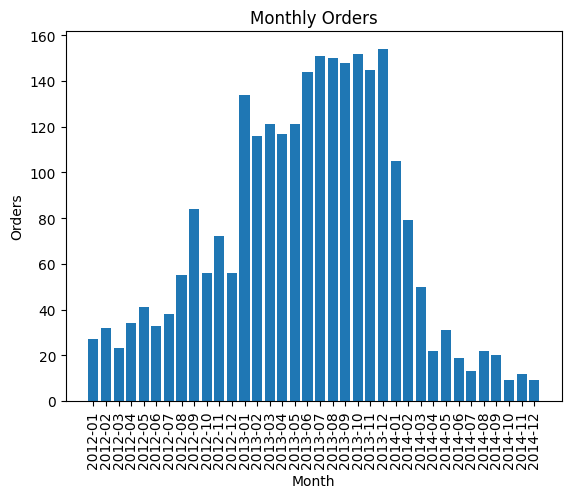

In [11]:
# Bar Chart
plt.bar(monthly_orders.index,monthly_orders['Order'])
plt.xlabel("Month")
plt.ylabel("Orders")
plt.title("Monthly Orders")
plt.xticks(monthly_orders.index, rotation='vertical')
plt.show()

### EDA Insight 2 - Number of Orders by Day of the week

In [12]:
# Creating a acolumn for capturing week days
all_except_last['weekday'] = all_except_last['Delivery Date'].dt.weekday

# Dictionary mapping
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}

# Using numpy.select
all_except_last['Week Day'] = np.select(
    [all_except_last['weekday'] == k for k in weekday_map.keys()],
    [weekday_map[k] for k in weekday_map.keys()],
    default='Other'  # Handle cases where week_int doesn't match any key (optional)
)

all_except_last.head()

,Order,SKU,Member,Delivery Date,Name,month_yr,weekday,Week Day
0,8358896,15668375,SSCEHNS,2013-02-11,Root Vegetables,2013-02,0,Monday
1,8358896,15668467,SSCEHNS,2013-02-11,Beans,2013-02,0,Monday
2,8358896,15669863,SSCEHNS,2013-02-11,Moong Dal,2013-02,0,Monday
3,8358896,15669778,SSCEHNS,2013-02-11,Other Dals,2013-02,0,Monday
4,8358896,15669767,SSCEHNS,2013-02-11,Urad Dal,2013-02,0,Monday


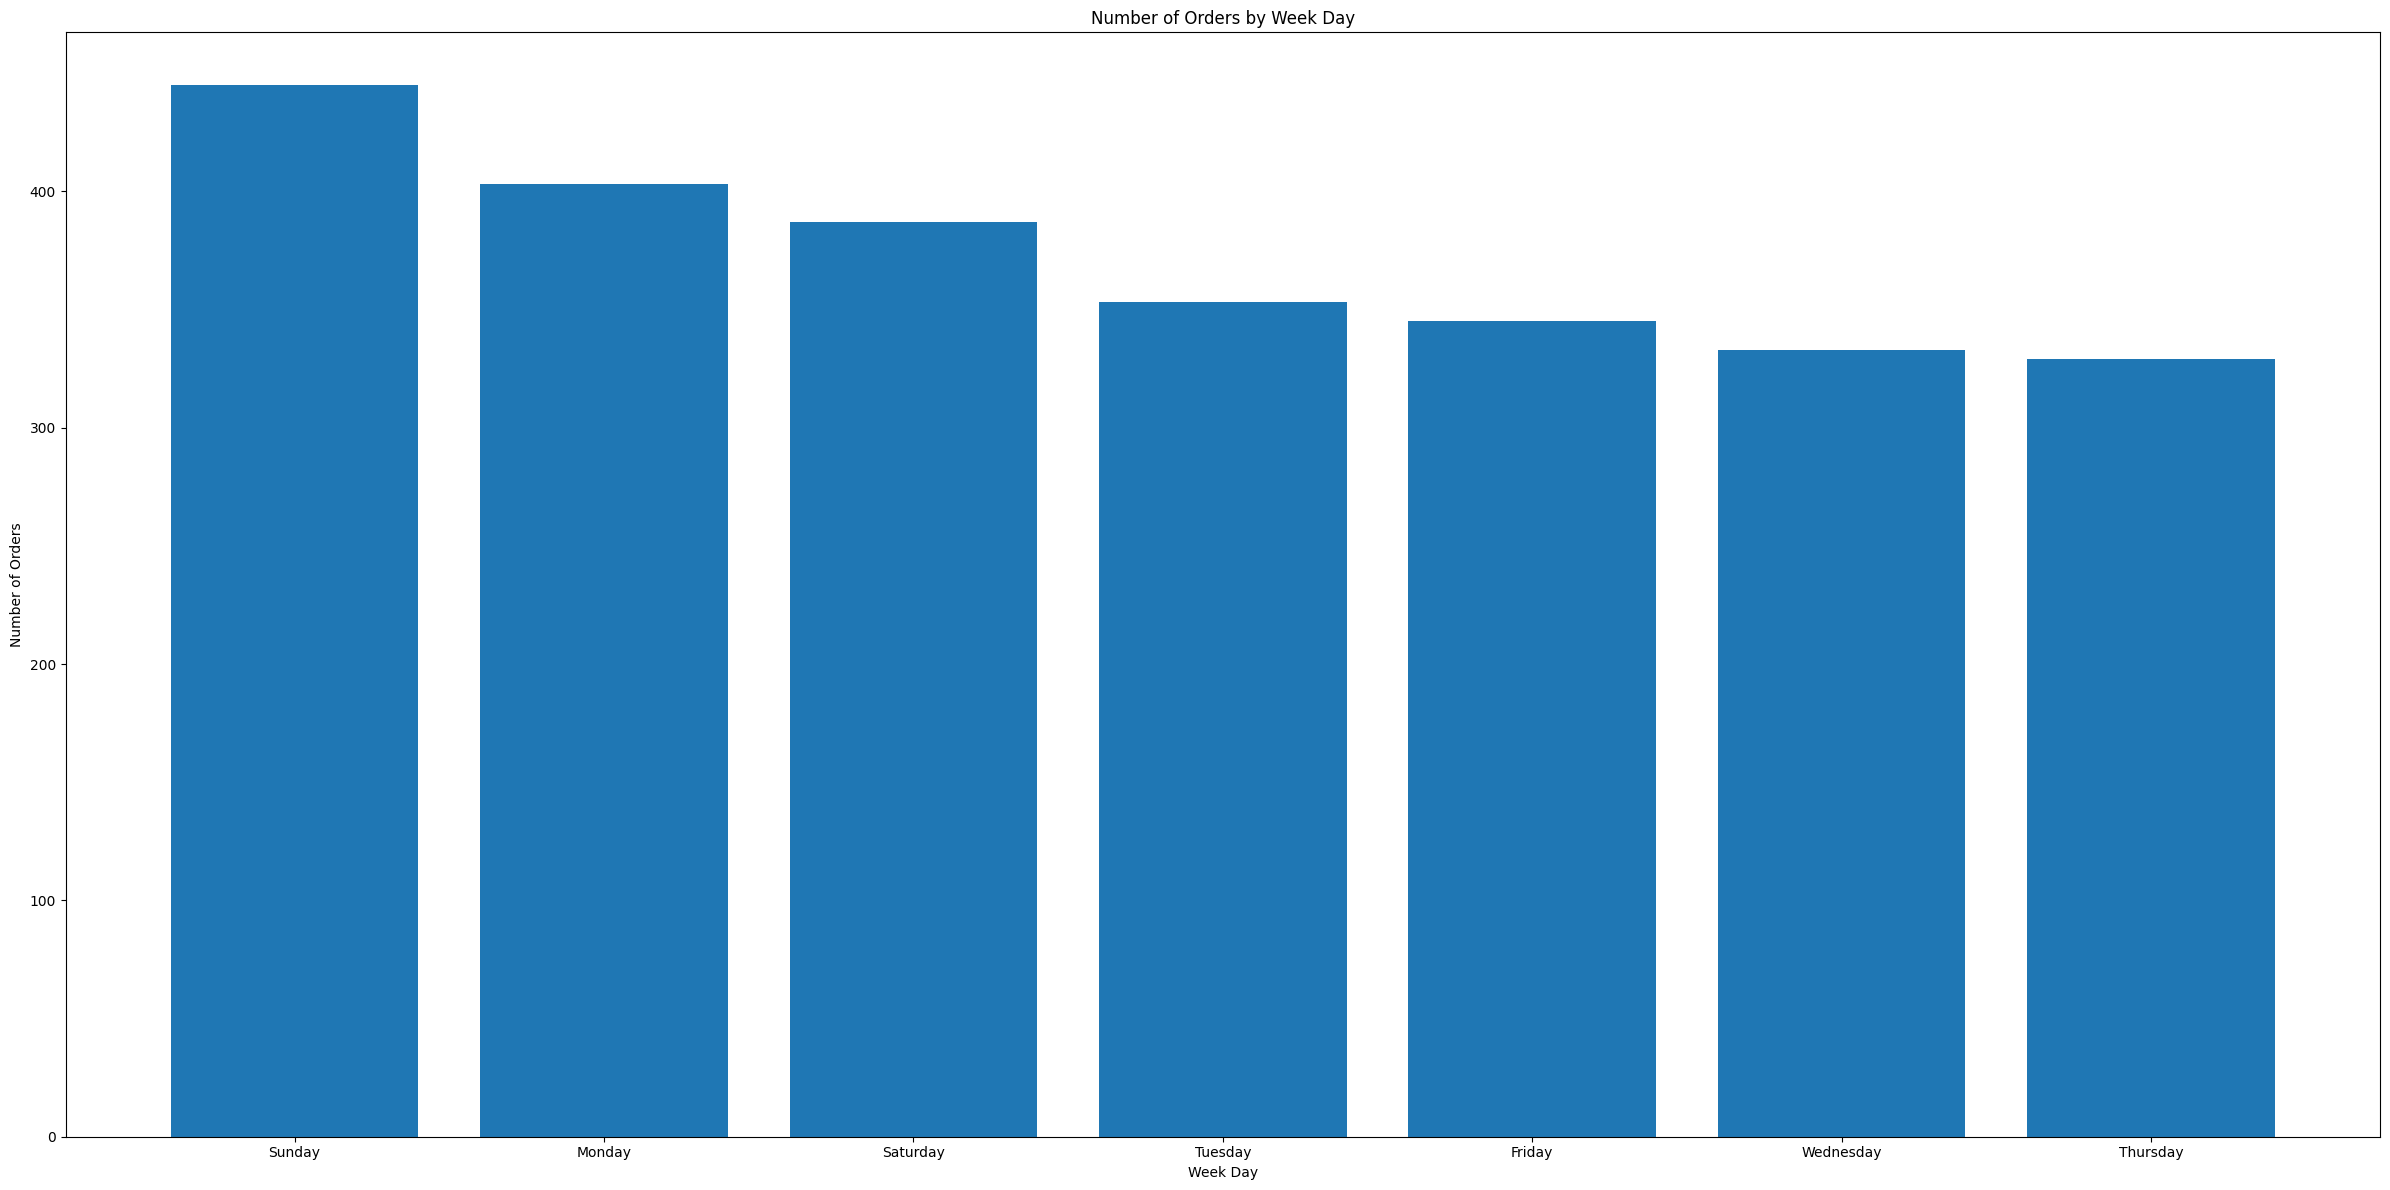

In [13]:
temp_df = all_except_last.groupby('Week Day').agg(
    num_orders = ('Order','nunique')
# ).sort_index()
).sort_values(by = 'num_orders', ascending = False).reset_index()



# Creating the bar chart for no of orders by week days
plt.figure(figsize=(24, 12))
plt.bar(temp_df['Week Day'], temp_df['num_orders'])

# Customize the chart
plt.title('Number of Orders by Week Day')
plt.xlabel('Week Day')
plt.ylabel('Number of Orders')
# plt.xticks(rotation=90)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()

# Display the chart
plt.show()

### EDA Insight 3 - Average Orders per Customer

In [14]:
# Calculating Avg Orders per customer
agg_df = all_except_last.groupby('Member').agg(
    num_orders=('Order', 'nunique'),
    num_items=('Order', 'count')
).sort_values(by = 'num_orders').reset_index()

agg_df['avg_items_per_order'] = round(agg_df['num_items']/agg_df['num_orders'],0)
agg_df

,Member,num_orders,num_items,avg_items_per_order
0,SWRNHCS,1,10,10.0
1,SSWWENC,1,8,8.0
2,SSWWLCZ,1,10,10.0
3,SSWWRHW,1,9,9.0
4,SSWZHRR,1,9,9.0
...,...,...,...,...
633,SSCZRCZ,15,193,13.0
634,SSSREHN,15,184,12.0
635,SWLLREW,16,239,15.0
636,SWNORRH,16,206,13.0


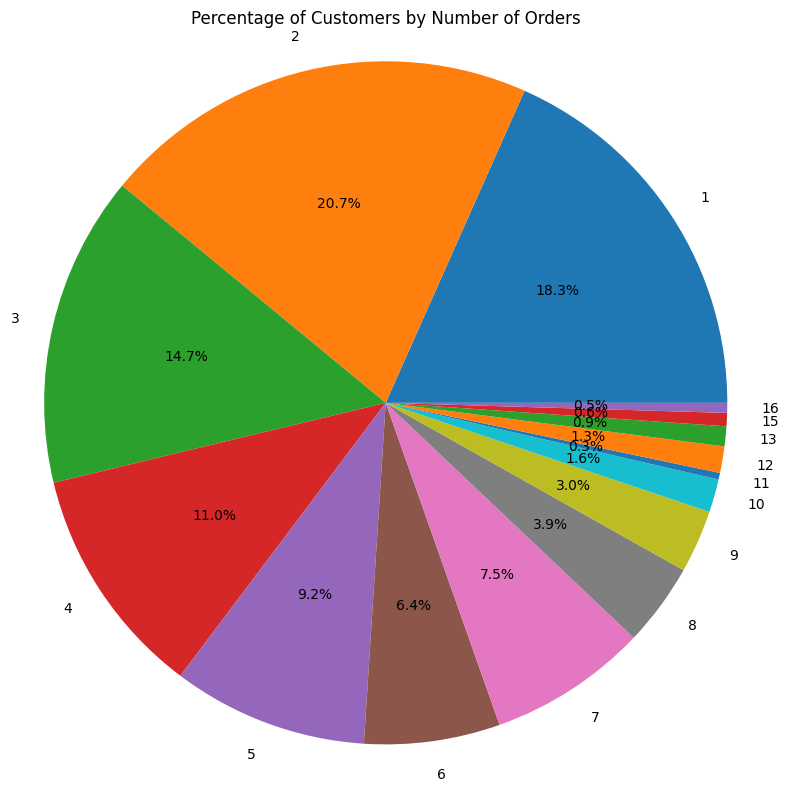

In [15]:
# Calculating % of Customers by no of orders
pie_numorders_df = agg_df.groupby('num_orders').agg(
    num_cx = ('Member','nunique')
).sort_values(by='num_orders').reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_numorders_df['num_cx'], labels=pie_numorders_df['num_orders'], autopct='%1.1f%%')
plt.title('Percentage of Customers by Number of Orders')
plt.axis('equal')
plt.tight_layout()
plt.show()


### More than 50 % of the Customers have placed less than or equal to 3 all_except_last

### EDA Insight 4 - Most Popular SKUs (Top 20)

In [16]:
# Printing top 20 ordered SKU's
temp_df = all_except_last.groupby('Name').agg(
    num_orders = ('Order','nunique'),
    num_cx = ('Member','nunique')
).reset_index()

temp_df = temp_df.sort_values('num_orders', ascending=False)


temp_df.head(20)

,Name,num_orders,num_cx
79,Other Vegetables,1199,467
68,Other Dals,1191,472
6,Beans,1154,435
113,Whole Spices,1058,423
92,Root Vegetables,1057,410
107,Toor Dal,1002,401
101,Sugar,908,345
56,Moong Dal,874,369
11,Brinjals,847,377
36,Gourd & Cucumber,818,352


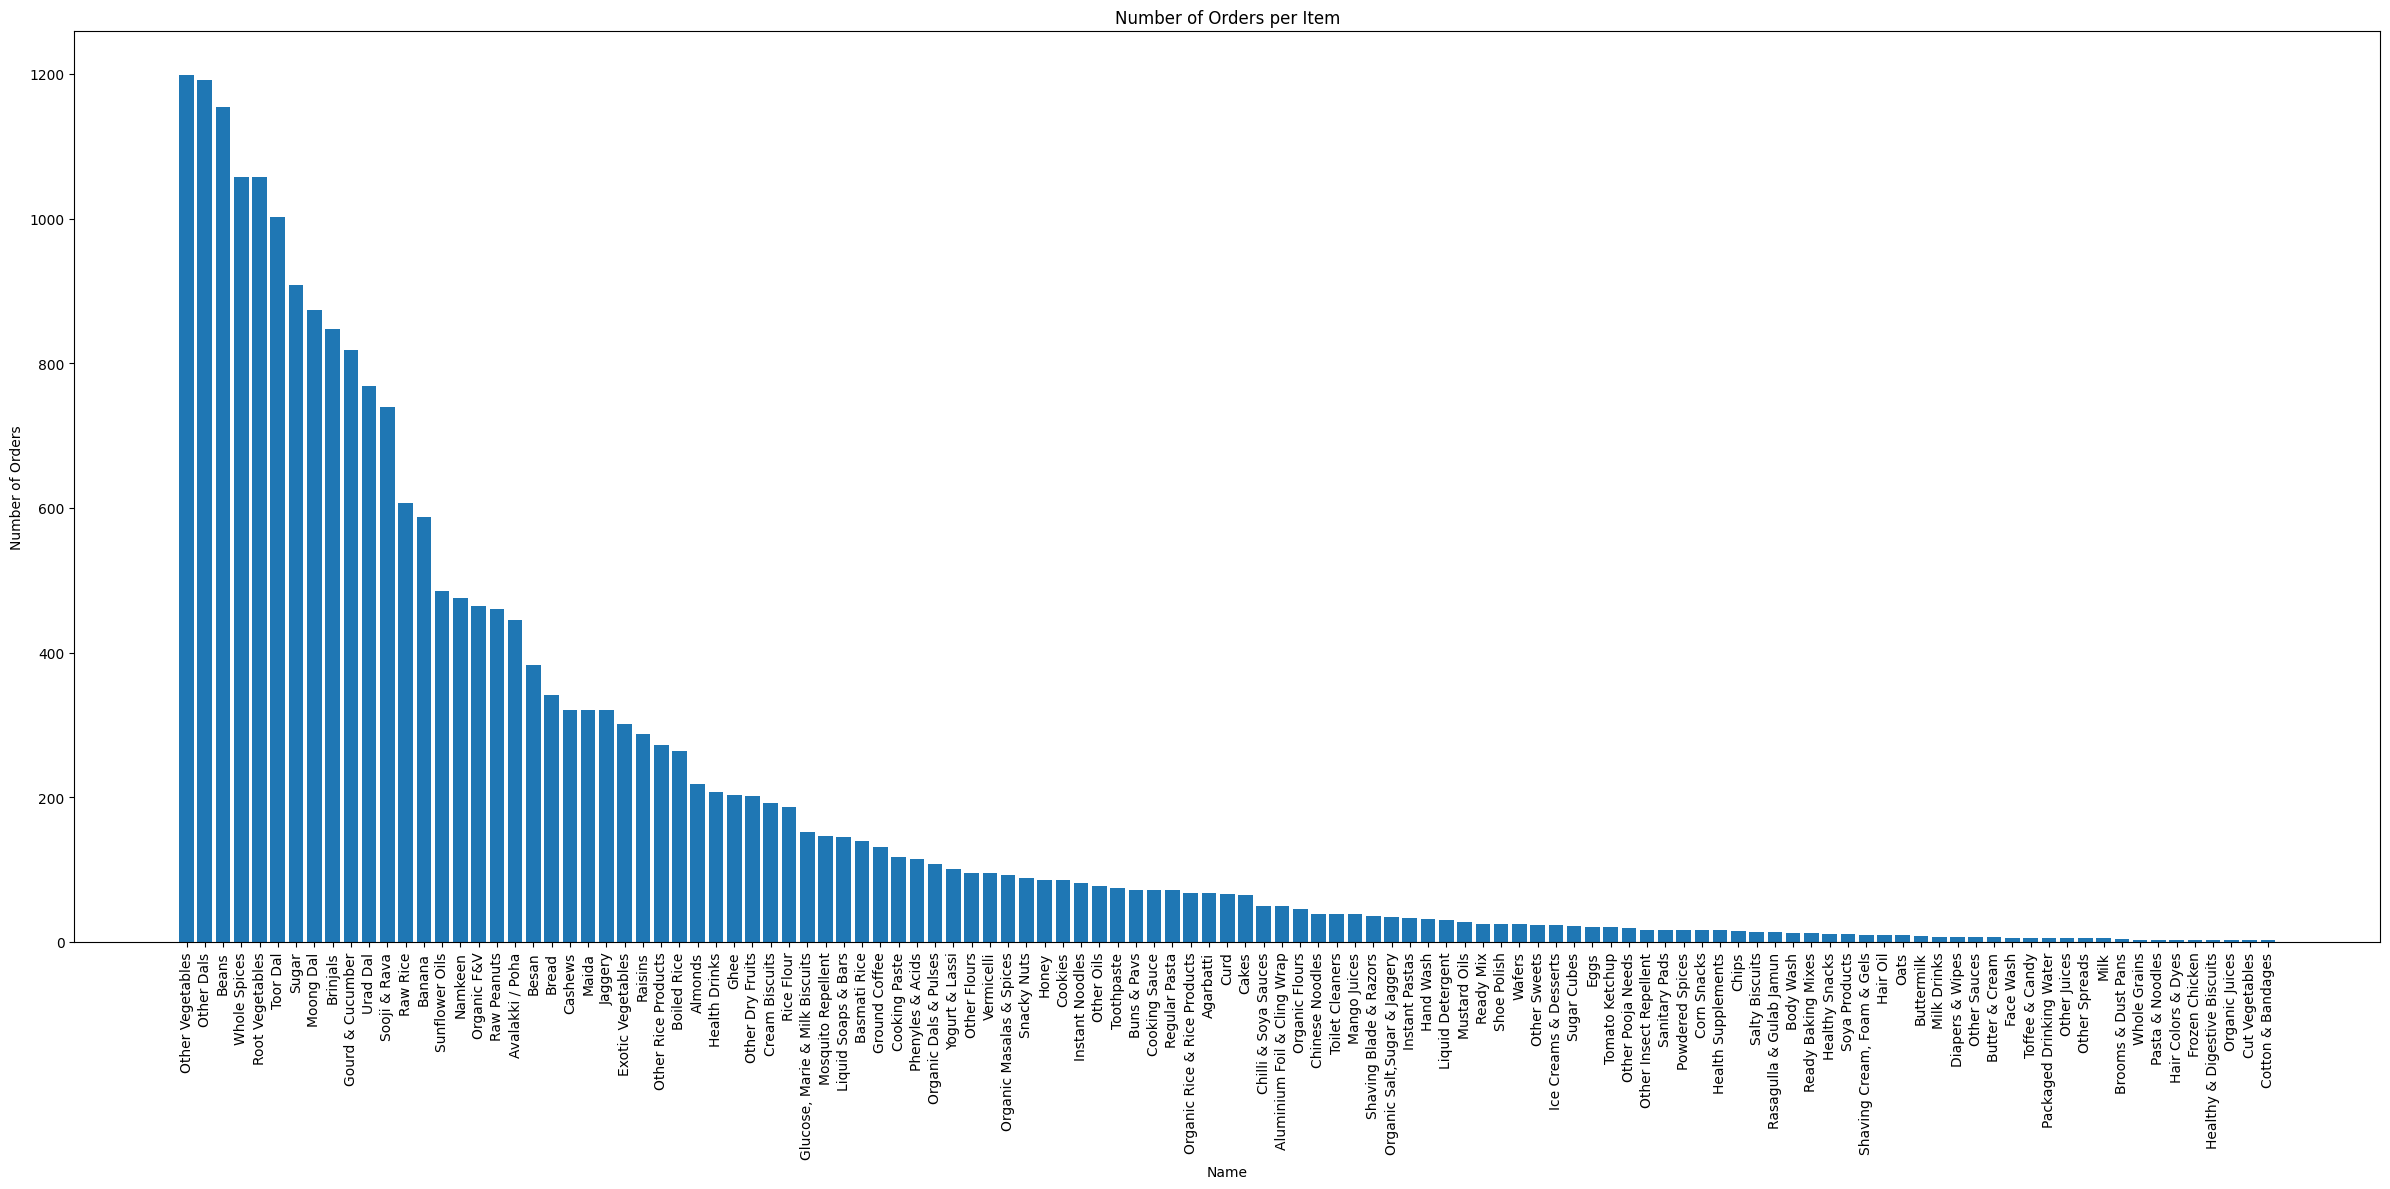

In [17]:
# Creating the bar chart for SKU's in decreasing ordering rate
plt.figure(figsize=(24, 12))
plt.bar(temp_df['Name'], temp_df['num_orders'])

# Customize the chart
plt.title('Number of Orders per Item')
plt.xlabel('Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()

# Display the chart
plt.show()

### EDA Insight 5 - Total SKUs per order

Average Order Size = 11.169171483622351


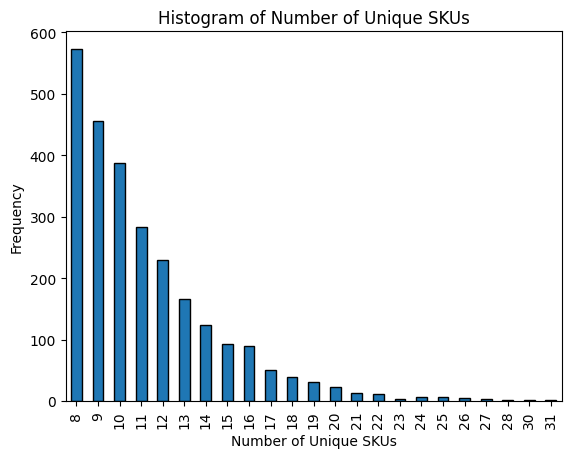

In [18]:
# Getting total SKU's per order
temp_df = all_except_last.groupby('Order').agg(
    num_sku = ('SKU','nunique')
).reset_index()

print(f'Average Order Size = {temp_df["num_sku"].mean()}')

# Count the frequency of each num_sku value
num_sku_counts = temp_df['num_sku'].value_counts().sort_index()

# Plotting histogram
num_sku_counts.plot(kind='bar', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Unique SKUs')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Unique SKUs')

# Show plot
plt.show()

### EDA Insight 6 - Avg Monthly Orders by the Members

   month_yr     Order
0   2012-01  1.038462
1   2012-02  1.032258
2   2012-03  1.045455
3   2012-04  1.096774
4   2012-05  1.205882
..      ...       ...
31  2014-08  1.100000
32  2014-09  1.052632
33  2014-10  1.000000
34  2014-11  1.000000
35  2014-12  1.000000

[36 rows x 2 columns]


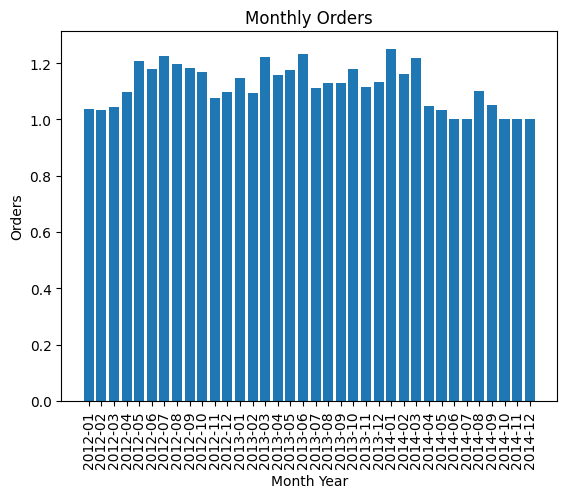

In [19]:
# Group by month and member, then count unique orders
monthly_orders = all_except_last.groupby(by=['month_yr', 'Member']).nunique()['Order']

# Calculating average monthly orders
avg_monthly_orders = monthly_orders.groupby('month_yr').mean()
avg_monthly_orders = avg_monthly_orders.reset_index().rename(columns={0: 'Avg_Monthly_Orders'})
avg_monthly_orders = avg_monthly_orders.sort_values(by='month_yr', ascending=True)
print(avg_monthly_orders)

# Bar Chart
plt.bar(avg_monthly_orders['month_yr'],avg_monthly_orders['Order'])
plt.xlabel("Month Year")
plt.ylabel("Orders")
plt.title("Monthly Orders")
plt.xticks(avg_monthly_orders.index, rotation='vertical')
plt.show()

#### Last Orders Subset dataset EDA

In [20]:
last_orders

,Order,SKU,Member,Delivery Date,Name
0,7409204,15669778,SWLCNOE,05/09/13,Other Dals
1,8076206,15669977,SWOEZES,01/04/14,Almonds
2,7560723,7593949,SSWWRHW,30/06/13,Cream Biscuits
3,8362837,15669764,SWLSCOZ,06/11/13,Besan
4,8202458,15670196,SSRCRSO,03/02/14,Organic F&V
...,...,...,...,...,...
5482,8269882,15668469,SWNHZNW,05/01/14,Beans
5483,8384422,15669875,SSWNRHC,18/11/13,Toor Dal
5484,7493590,15668465,SWRELHW,07/08/13,Root Vegetables
5485,8080319,15670267,SSNSECH,03/04/14,Toor Dal


In [21]:
last_orders = last_orders.astype({"Member":"string","Delivery Date":"datetime64[ns]","Name":"string"})
last_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order          5487 non-null   int64         
 1   SKU            5487 non-null   int64         
 2   Member         5487 non-null   string        
 3   Delivery Date  5487 non-null   datetime64[ns]
 4   Name           5487 non-null   string        
dtypes: datetime64[ns](1), int64(2), string(2)
memory usage: 214.5 KB


In [22]:
## Last order

last_orders = last_orders[['Order','SKU','Member']].drop_duplicates()

### Removing New SKUs
values_to_remove = [34986120,34987614,7753782,7629044]

# Create a boolean mask for rows to keep (where SKU is not in the removal list)
mask = ~last_orders['SKU'].isin(values_to_remove)

# Filter the DataFrame using the mask
last_order = last_orders[mask]

last_order


,Order,SKU,Member
0,7409204,15669778,SWLCNOE
1,8076206,15669977,SWOEZES
2,7560723,7593949,SSWWRHW
3,8362837,15669764,SWLSCOZ
4,8202458,15670196,SSRCRSO
...,...,...,...
5482,8269882,15668469,SWNHZNW
5483,8384422,15669875,SSWNRHC
5484,7493590,15668465,SWRELHW
5485,8080319,15670267,SSNSECH


### EDA for Last Order File - Break up by Customer Type

In [23]:
user_type = all_except_last.groupby('Member')['Order'].nunique().reset_index(name='user_num_orders')

temp_df = last_orders.merge(user_type, on='Member', how='left')

## bringing down to order level

temp_df = temp_df[['Order','user_num_orders']].drop_duplicates()

temp_df

,Order,user_num_orders
0,7409204,8
1,8076206,11
2,7560723,1
3,8362837,7
4,8202458,4
...,...,...
2675,7581908,4
2677,8179077,6
2771,8226852,1
2969,8213552,5


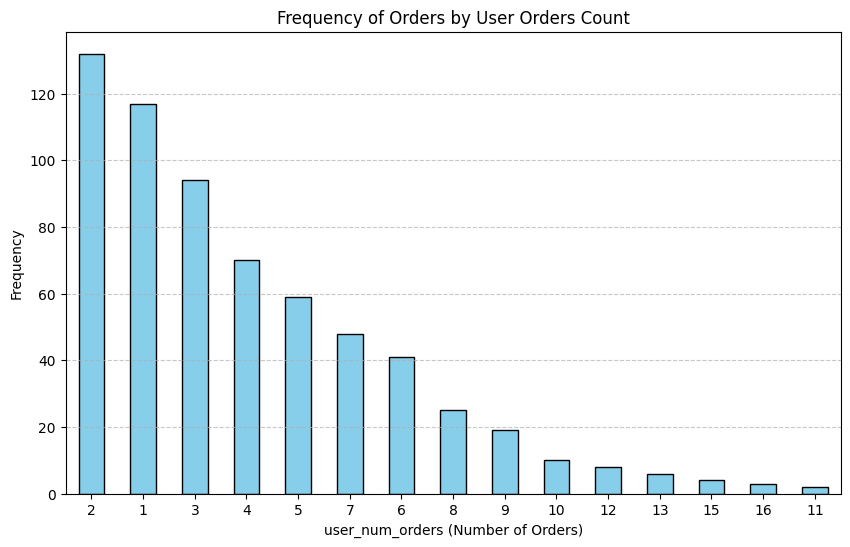

In [24]:
user_num_orders_counts = temp_df['user_num_orders'].value_counts()  # Count frequencies for each Order

plt.figure(figsize=(10, 6))  # Set figure size (optional)
user_num_orders_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Create bar chart
plt.xlabel('user_num_orders (Number of Orders)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Frequency of Orders by User Orders Count')  # Set chart title
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add faint gridlines (optional)
plt.show()

## Stage 2 - Creating test and training datasets

In [25]:
# To create an 80-20 train-test split, we need the 20% of the  members' data to be in train set. for this we will need the following # of members' be considered as the "testing data"
all_except_last['Member'].nunique() * 0.2

127.60000000000001

In [26]:
# Getting Orders per customers
orders_per_customer = all_except_last.groupby('Member').agg(
    num_orders=('Order', 'nunique'),
    num_items=('Order', 'count')
)

orders_per_customer

,num_orders,num_items
Member,,
SSCEHNS,12,112
SSCESNS,2,28
SSCEWZO,5,43
SSCHNCE,6,71
SSCLCSW,4,42
...,...,...
SWRNCEH,1,8
SWRNCSS,2,20
SWRNEHZ,4,38


In [27]:
# Customers chosen to be part of the test data set -
test_members = orders_per_customer[(orders_per_customer['num_orders'] > 2)]
test_members

,num_orders,num_items
Member,,
SSCEHNS,12,112
SSCEWZO,5,43
SSCHNCE,6,71
SSCLCSW,4,42
SSCLLWS,4,38
...,...,...
SWRLHOS,7,66
SWRLOEC,9,107
SWRLSWR,7,84


In [28]:
# Finding the most recent order for all customers
most_recent_orders = all_except_last.loc[all_except_last.groupby('Member')['Delivery Date'].idxmax()]
most_recent_orders

,Order,SKU,Member,Delivery Date,Name,month_yr,weekday,Week Day
38,8224775,15668375,SSCEHNS,2014-12-01,Root Vegetables,2014-12,0,Monday
131,8101025,15668375,SSCESNS,2014-03-16,Root Vegetables,2014-03,6,Sunday
175,8152509,15668378,SSCEWZO,2014-09-03,Other Vegetables,2014-09,2,Wednesday
246,8203855,15669821,SSCHNCE,2014-03-02,Whole Spices,2014-03,6,Sunday
284,8101719,15668379,SSCLCSW,2014-03-15,Other Vegetables,2014-03,5,Saturday
...,...,...,...,...,...,...,...,...
28851,7785380,15668519,SWRNCEH,2012-09-11,Bread,2012-09,1,Tuesday
28868,7609962,15668477,SWRNCSS,2013-02-05,Exotic Vegetables,2013-02,1,Tuesday
28908,8138434,15668375,SWRNEHZ,2014-03-03,Root Vegetables,2014-03,0,Monday
28964,7747935,15668520,SWRNESE,2012-12-22,Bread,2012-12,5,Saturday


In [29]:
# Considering only the last orders of 20% members taken as the test set -
test_members_most_recent = most_recent_orders[most_recent_orders['Member'].isin(test_members.index)]
test_members_most_recent

,Order,SKU,Member,Delivery Date,Name,month_yr,weekday,Week Day
38,8224775,15668375,SSCEHNS,2014-12-01,Root Vegetables,2014-12,0,Monday
175,8152509,15668378,SSCEWZO,2014-09-03,Other Vegetables,2014-09,2,Wednesday
246,8203855,15669821,SSCHNCE,2014-03-02,Whole Spices,2014-03,6,Sunday
284,8101719,15668379,SSCLCSW,2014-03-15,Other Vegetables,2014-03,5,Saturday
324,8263980,15668375,SSCLLWS,2013-12-30,Root Vegetables,2013-12,0,Monday
...,...,...,...,...,...,...,...,...
28612,7419744,15668375,SWRLHOS,2013-12-09,Root Vegetables,2013-12,0,Monday
28748,8219129,15669778,SWRLOEC,2014-09-02,Other Dals,2014-09,1,Tuesday
28824,8160271,15668688,SWRLSWR,2014-12-02,Root Vegetables,2014-12,1,Tuesday
28908,8138434,15668375,SWRNEHZ,2014-03-03,Root Vegetables,2014-03,0,Monday


In [30]:
#Creating Test Data
test_data = all_except_last[all_except_last['Order'].isin(test_members_most_recent['Order'])]
test_data = test_data[test_data['Order'].isin(test_data['Order'].unique()[:128])]

In [31]:
# Printing Test Data
print(test_data['Order'].nunique())
print(test_data['Member'].nunique())

128
128


In [32]:
# Creating Train Data
train_data = all_except_last[~all_except_last['Order'].isin(test_data['Order'])]
train_data

,Order,SKU,Member,Delivery Date,Name,month_yr,weekday,Week Day
0,8358896,15668375,SSCEHNS,2013-02-11,Root Vegetables,2013-02,0,Monday
1,8358896,15668467,SSCEHNS,2013-02-11,Beans,2013-02,0,Monday
2,8358896,15669863,SSCEHNS,2013-02-11,Moong Dal,2013-02,0,Monday
3,8358896,15669778,SSCEHNS,2013-02-11,Other Dals,2013-02,0,Monday
4,8358896,15669767,SSCEHNS,2013-02-11,Urad Dal,2013-02,0,Monday
...,...,...,...,...,...,...,...,...
28979,7466404,15669886,SWRNHCS,2013-01-09,Sooji & Rava,2013-01,2,Wednesday
28980,7466404,15669874,SWRNHCS,2013-01-09,Avalakki / Poha,2013-01,2,Wednesday
28981,7466404,15670260,SWRNHCS,2013-01-09,Organic F&V,2013-01,2,Wednesday
28982,7466404,15670196,SWRNHCS,2013-01-09,Organic F&V,2013-01,2,Wednesday


In [33]:
# Printing Train Data
print(train_data['Order'].nunique())
print(train_data['Member'].nunique())

2467
638


## Stage 4 - Recommendation System

### Model 1 - Collaborative Filtering (Item-based)

In [34]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [35]:
last_order = pd.read_csv('./last_orders_subset_v1.csv')

last_order = last_order.sort_values(by='Order')

### Removing New SKUs
values_to_remove = [34986120,34987614,7753782,7629044]

# Create a boolean mask for rows to keep (where SKU is not in the removal list)
mask = ~last_order['SKU'].isin(values_to_remove)

# Filter the DataFrame using the mask
last_order = last_order[mask]

last_order_grouped = last_order.groupby('Order')['SKU'].agg(list).reset_index()

last_order_grouped.head(10)

,Order,SKU
0,7341985,"[15669823, 15669869, 15668462, 15669817, 15668455, 15669863, 15669860, 34987..."
1,7344710,"[7580855, 15669825, 15668465, 15669772, 15668467, 15668381, 15668462]"
2,7345164,"[7625765, 15669824, 92435740, 15668451, 7689353, 34986328, 15668465, 1566846..."
3,7347668,"[15669874, 34989595, 15668378, 15669777, 15669821, 15669884, 15669861, 15668..."
4,7348817,"[15668478, 15669829, 7541573, 21408952, 15669776, 7580855, 15670267]"
5,7353545,"[7578341, 15669869, 93174226, 15669832, 15669762, 15668460, 15669778, 156683..."
6,7362980,"[7753740, 15668378, 15669977, 7613346, 7572300, 15668467, 15668449]"
7,7366964,"[15669792, 15668688, 15669828, 15668468, 15668379, 15669879, 15669799, 15669..."
8,7368676,"[15669881, 15669863, 15669815, 15669786, 93289485, 7570488, 7601938, 15670267]"
9,7369866,"[15668375, 15670269, 15668465, 21409004, 15669772, 15669866, 15668380]"


#### One Hot Encoding the Basket

In [36]:
all_except_last['Quantity'] = 1


basket_ohe= all_except_last.pivot( index='SKU',
                          columns='Order',
                          values = "Quantity" ).astype('float16')

basket_ohe.fillna( 0, inplace = True )
basket_ohe = basket_ohe.sort_values(by='SKU', ascending=True)

##basket_ohe['Total'] = basket_ohe.sum(axis=1)

basket_ohe

Order,7340037,7340368,7340638,7340671,7340893,7341000,7341085,7341350,7341392,7341760,...,8383509,8384397,8384428,8385119,8385848,8385942,8386131,8386872,8387583,8387603
SKU,,,,,,,,,,,,,,,,,,,,,
6884195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7541573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7543241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7547271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7547296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93176431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93289485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SKU vs SKU Similarity matrix

In [37]:
sim = 1 - pairwise_distances(basket_ohe.to_numpy(), metric="correlation" )
sim_df = pd.DataFrame( sim )

# Setting negative values to zero
sim_df = sim_df.where(sim_df >= 0, 0)

# Retaining SKu as Index and Column names
sim_df.values[np.arange(len(sim_df)), np.arange(len(sim_df))] = 0

sim_df = sim_df.set_index(basket_ohe.index)
sim_df.columns = sim_df.index.to_list()

sim_df

,6884195,7541573,7543241,7547271,7547296,7547323,7548497,7548498,7548511,7548730,...,93141092,93141093,93156751,93174226,93176429,93176430,93176431,93289485,93289486,93289487
SKU,,,,,,,,,,,,,,,,,,,,,
6884195,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
7541573,0.0,0.000000,0.0,0.000000,0.047530,0.000000,0.000000,0.059345,0.024270,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.032651,0.00000,0.015907
7543241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
7547271,0.0,0.000000,0.0,0.000000,0.181095,0.000000,0.000000,0.000000,0.071123,0.075718,...,0.051177,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.021781
7547296,0.0,0.047530,0.0,0.181095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176430,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.356651,0.000000,0.00000,0.147225
93176431,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.356651,0.000000,0.000000,0.00000,0.082601
93289485,0.0,0.032651,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.031916


In [38]:
output_dict = {}

## Iterating over each order in last_order
for i in range(last_order_grouped.shape[0]):

    ## storing the SKUs in the order
    sku_cart = last_order_grouped.iloc[i,1]

    ## creating subset of Item vs Item Similarity matrix based on SKUs in cart
    matrix = sim_df[sku_cart]

    ## Calculating the combined similarity of SKUs in cart on all other SKUs
    matrix['Total'] = matrix.sum(axis=1)

    ## Sorting SKUs by their combined similarity score
    matrix = matrix.sort_values(by='Total', ascending=False)

    ## Converting above SKUs to list retaining the order
    SKU_list = matrix.index.tolist()

    # Creating a new list which will exclude all recommended SKUs which are already present in the basket
    fresh_SKU_list = [sku for sku in SKU_list if sku not in sku_cart]

    ## Updating the output list with 5 recommended SKU for this ith order
    output_dict[last_order_grouped.iloc[i,0]] = fresh_SKU_list[:5]


## Converting prediction dictionary to Dataframe
keys = list(output_dict.keys())[:]
values = list(output_dict.values())[:]
df = pd.DataFrame({'Order': keys, 'SKU': values})

## Exploding the dataframe to get data to SKU level from Order level
prediction_df = df.explode('SKU')

## Adding ID column
prediction_df['ID'] = range(len(prediction_df))

### Adding Member column
last_member = last_order[['Member', 'Order']].drop_duplicates()
prediction_df =prediction_df.merge(last_member, on='Order', how='left')

## Getting the output in desired order
new_order = ['ID', 'Member', 'Order','SKU']  # Desired column order
prediction_df = prediction_df[new_order]

## Output
print(prediction_df)
# prediction_df.to_csv('./GR01_rec_5_sets.csv')

        ID   Member    Order       SKU
0        0  SWCCWNZ  7341985  15669777
1        1  SWCCWNZ  7341985  15669857
2        2  SWCCWNZ  7341985  34987566
3        3  SWCCWNZ  7341985  15669818
4        4  SWCCWNZ  7341985  15669760
...    ...      ...      ...       ...
3185  3185  SSZHOER  8385399  93141023
3186  3186  SSZHOER  8385399   7572430
3187  3187  SSZHOER  8385399  34986125
3188  3188  SSZHOER  8385399   7675055
3189  3189  SSZHOER  8385399  93141022

[3190 rows x 4 columns]


### Model 2 - Hybrid Model which makes use of both, item-based and user-based Collaborative Filtering Models

In [39]:
last_order_grouped = last_order.groupby(['Order','Member'])['SKU'].agg(list).reset_index()
last_order_grouped = last_order_grouped.merge(user_type, on='Member', how='left')

last_order_grouped

,Order,Member,SKU,user_num_orders
0,7341985,SWCCWNZ,"[15669823, 15669869, 15668462, 15669817, 15668455, 15669863, 15669860, 34987...",4
1,7344710,SWRHERW,"[7580855, 15669825, 15668465, 15669772, 15668467, 15668381, 15668462]",4
2,7345164,SWCENNH,"[7625765, 15669824, 92435740, 15668451, 7689353, 34986328, 15668465, 1566846...",4
3,7347668,SSZZLEO,"[15669874, 34989595, 15668378, 15669777, 15669821, 15669884, 15669861, 15668...",2
4,7348817,SSSELNE,"[15668478, 15669829, 7541573, 21408952, 15669776, 7580855, 15670267]",3
...,...,...,...,...
633,8378408,SSWLNRZ,"[15668457, 15669875, 15668379, 15668465, 15668460, 15668455, 15668375, 15668...",4
634,8380659,SWENOEW,"[15669817, 15669764, 15668467, 21409002, 15669775, 15669864, 15668688]",1
635,8383377,SWNZWRC,"[7570594, 15669875, 7580781, 7642810, 15669760, 34986129, 15669876]",5
636,8384422,SSWNRHC,"[15669819, 15669765, 15669875, 7541573, 15669860, 7569624, 15669861, 15669869]",1


#### Overall Item vs Item Similairy

In [40]:
all_except_last['Quantity'] = 1

basket_ohe= all_except_last.pivot( index='SKU',
                          columns='Order',
                          values = "Quantity" ).astype('float16')

basket_ohe.fillna( 0, inplace = True )
basket_ohe = basket_ohe.sort_values(by='SKU', ascending=True)

##basket_ohe['Total'] = basket_ohe.sum(axis=1)

basket_ohe

Order,7340037,7340368,7340638,7340671,7340893,7341000,7341085,7341350,7341392,7341760,...,8383509,8384397,8384428,8385119,8385848,8385942,8386131,8386872,8387583,8387603
SKU,,,,,,,,,,,,,,,,,,,,,
6884195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7541573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7543241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7547271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7547296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93176431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93289485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [42]:
sim = 1 - pairwise_distances(basket_ohe.to_numpy(), metric="correlation" )
sim_df = pd.DataFrame( sim )

# Setting negative values to zero
sim_df = sim_df.where(sim_df >= 0, 0)

# Retaining SKu as Index and Column names
sim_df.values[np.arange(len(sim_df)), np.arange(len(sim_df))] = 0

sim_df = sim_df.set_index(basket_ohe.index)
sim_df.columns = sim_df.index.to_list()

overall_sim_df = sim_df

overall_sim_df

,6884195,7541573,7543241,7547271,7547296,7547323,7548497,7548498,7548511,7548730,...,93141092,93141093,93156751,93174226,93176429,93176430,93176431,93289485,93289486,93289487
SKU,,,,,,,,,,,,,,,,,,,,,
6884195,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
7541573,0.0,0.000000,0.0,0.000000,0.047530,0.000000,0.000000,0.059345,0.024270,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.032651,0.00000,0.015907
7543241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
7547271,0.0,0.000000,0.0,0.000000,0.181095,0.000000,0.000000,0.000000,0.071123,0.075718,...,0.051177,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.021781
7547296,0.0,0.047530,0.0,0.181095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176430,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.356651,0.000000,0.00000,0.147225
93176431,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.356651,0.000000,0.000000,0.00000,0.082601
93289485,0.0,0.032651,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.031916


In [43]:

### Frequent SKUs by Customer

sku_by_cust = (
    all_except_last.groupby(['Member', 'SKU'])['Order']
    .nunique()  # Count distinct Order for each group (Member, SKU)
    .to_frame(name='num_times')  # Create DataFrame with count as 'num_times'
    .reset_index()  # Convert grouping columns back to regular columns
    .sort_values(by=['Member', 'num_times'], ascending=[True, False])  # Sort by Member (asc) and num_times (desc)
)
sku_by_cust = sku_by_cust.groupby('Member')['SKU'].agg(list).reset_index()

print(sku_by_cust)

      Member  \
0    SSCEHNS   
1    SSCESNS   
2    SSCEWZO   
3    SSCHNCE   
4    SSCLCSW   
..       ...   
633  SWRNCEH   
634  SWRNCSS   
635  SWRNEHZ   
636  SWRNESE   
637  SWRNHCS   

                                                                                 SKU  
0    [7580823, 15668377, 15669865, 15669772, 15669970, 15668375, 15668416, 156684...  
1    [15668462, 7572252, 15668375, 15668377, 15668378, 15668453, 15668456, 156684...  
2    [15668478, 15668688, 15669789, 15668379, 15669760, 15669774, 34987566, 34987...  
3    [15669767, 15669814, 7587667, 7587675, 7625556, 15668379, 15668478, 15669775...  
4    [15668685, 15668381, 15668460, 15668379, 15668458, 15668462, 15668468, 75698...  
..                                                                               ...  
633  [7570594, 15668378, 15668383, 15668458, 15668519, 15669863, 15669864, 15669887]  
634  [15669871, 15668379, 15668449, 15668466, 15668477, 15669777, 15669778, 15669...  
635  [7593949, 7718555, 

In [44]:
sku_by_cust[sku_by_cust['Member'] == last_order_grouped.iloc[0]['Member'] ].iloc[0,1]


[15669863,
 15668457,
 15669860,
 15669861,
 15669878,
 34985989,
 7569803,
 7572314,
 7580780,
 7580823,
 7587668,
 7587670,
 15668375,
 15668383,
 15668451,
 15668454,
 15668455,
 15668459,
 15668460,
 15668468,
 15668474,
 15668685,
 15669760,
 15669763,
 15669780,
 15669810,
 15669817,
 15669821,
 15669859,
 15669885,
 15669976,
 15669982,
 21409002,
 34986119,
 34987566]

In [45]:
last_order_grouped.iloc[0]['Member']

'SWCCWNZ'

In [46]:
last_order_grouped.iloc[0]['user_num_orders']

4

In [47]:
overall_item_based_output_dict = {}

sku_cart = last_order_grouped.iloc[0,2]

matrix = overall_sim_df[sku_cart]
matrix['Total'] = matrix.sum(axis=1)
matrix = matrix.sort_values(by='Total', ascending=False)
##matrix = matrix.head(5)
SKU_list = matrix.index.tolist()
fresh_SKU_list = [sku for sku in SKU_list if sku not in sku_cart]

overall_item_based_output_dict[last_order_grouped.iloc[0,0]] = fresh_SKU_list[:5]

overall_item_based_output_dict

{7341985: [15669777, 15669857, 34987566, 15669818, 15669760]}

#### Building the Function:

In [48]:
overall_item_based_output_dict = {}

for i in range(len(last_order_grouped)):

    if last_order_grouped.iloc[i]['user_num_orders'] <= 3:

        ## Go ahead with Overall Item vs Item Similarity

            sku_cart = last_order_grouped.iloc[i,2]

            matrix = overall_sim_df[sku_cart]
            matrix['Total'] = matrix.sum(axis=1)
            matrix = matrix.sort_values(by='Total', ascending=False)
            ##matrix = matrix.head(5)
            SKU_list = matrix.index.tolist()
            fresh_SKU_list = [sku for sku in SKU_list if sku not in sku_cart]

            overall_item_based_output_dict[last_order_grouped.iloc[i,0]] = fresh_SKU_list[:5]


    else:

        ## Go ahead with Hybrid - Frequent SKUs + Overall
        sku_cart = last_order_grouped.iloc[i,2]

        member_key = last_order_grouped.iloc[i]['Member']
        frequent_sku_list = sku_by_cust[sku_by_cust['Member'] == member_key].iloc[0,1]

        fresh_SKU_list = [sku for sku in frequent_sku_list if sku not in sku_cart]

        overall_item_based_output_dict[last_order_grouped.iloc[i,0]] = fresh_SKU_list[:2]

        ## Appending 3 entries from overall item vs item
        sku_cart = last_order_grouped.iloc[i,2]

        matrix = overall_sim_df[sku_cart]
        matrix['Total'] = matrix.sum(axis=1)
        matrix = matrix.sort_values(by='Total', ascending=False)
         ##matrix = matrix.head(5)
        SKU_list = matrix.index.tolist()
        fresh_SKU_list = [sku for sku in SKU_list if sku not in sku_cart]

        to_append = [sku for sku in fresh_SKU_list if sku not in overall_item_based_output_dict[last_order_grouped.iloc[i,0]]]

        to_append = to_append[:3]

        for li in to_append:

             overall_item_based_output_dict[last_order_grouped.iloc[i,0]].append(li)




In [49]:
keys = list(overall_item_based_output_dict.keys())[:]
values = list(overall_item_based_output_dict.values())[:]
df = pd.DataFrame({'Order': keys, 'SKUs': values})
df

,Order,SKUs
0,7341985,"[15668457, 15669861, 15669777, 15669857, 34987566]"
1,7344710,"[15669777, 7580802, 15668460, 15668378, 15668688]"
2,7345164,"[15668416, 15668453, 15668688, 15668462, 15668383]"
3,7347668,"[15669776, 15669880, 15669761, 34987566, 15669781]"
4,7348817,"[15669781, 15669870, 15669777, 15669767, 15669818]"
...,...,...
633,8378408,"[15668381, 15668451, 15668688, 15668462, 15668378]"
634,8380659,"[15669857, 15669870, 15669776, 15669872, 15669832]"
635,8383377,"[15669856, 15669878, 15669821, 15669776, 15669823]"
636,8384422,"[15669885, 15669866, 15669762, 15669769, 15669772]"


In [52]:
prediction_df = df.explode('SKUs')  # Efficiently expand lists into separate rows
##df_ungrouped = df[['Order', 'SKUs']]
prediction_df['ID'] = range(len(prediction_df))

### Adding Member column
last_member = last_order[['Member', 'Order']].drop_duplicates()
prediction_df =prediction_df.merge(last_member, on='Order', how='left')

##prediction_df
prediction_df.set_index('ID').to_csv('./GR01_rec_5_sets.csv')

### Model 3 - Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
train_data['Quantity'] = 1

train_data_pivot = train_data.pivot( index='Order',
                          columns='SKU',
                          values = "Quantity" ).astype('float16').reset_index(drop=True)

train_data_pivot.fillna( 0, inplace = True )

train_data_pivot.head(10)

SKU,6884195,7541573,7543241,7547271,7547296,7547323,7548497,7548498,7548511,7548730,...,93141092,93141093,93156751,93174226,93176429,93176430,93176431,93289485,93289486,93289487
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data_pivot.shape

(2467, 632)

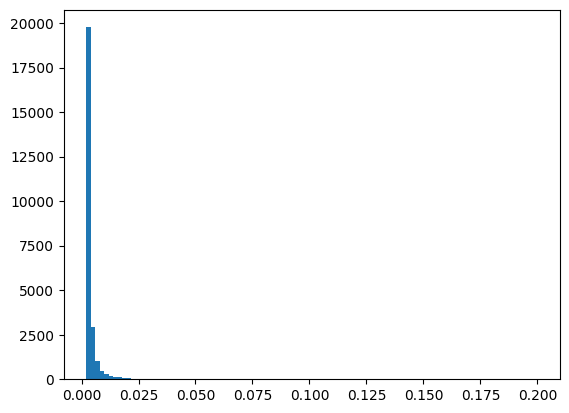

In [ ]:
# Using the Apriori algorithm to find the finding itemsets of SKUs which are bought together
# The min_support parameter is used to filter SKUs based on their abundance/frequency in the dataset (in our case, historical orders of users)
# We have chosen a min_support level of 0.003 after trial-and-error, which will result in itemsets which are significantly related to each other
frequent_itemsets = apriori(train_data_pivot,
                            min_support=0.002,
                            use_colnames=True,
                            low_memory = True)

plt.hist(frequent_itemsets.support, bins=100);

In [ ]:
# Creating the association rules based on the frequent itemsets, with a minimum confidence level of 0.2
# The reason to choose confidence as the metric is to generate recommendations based on the given SKUs since 
# confidence tells us the probability of seeing a SKU (consequent) in the same transaction, given the other SKUs (antecedents)
# The value for confidence was chosen after trial-and-error, which will result in generating the best consequents
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.2)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(7541573),(15668460),0.013782,0.177544,0.002837,0.205882,1.159616,0.000391,1.035686,0.139569
1,(7541573),(15668462),0.013782,0.126064,0.002837,0.205882,1.633157,0.001100,1.100512,0.393107
2,(7547271),(15669764),0.010134,0.122821,0.002432,0.240000,1.954059,0.001187,1.154183,0.493243
3,(7547271),(15669856),0.010134,0.115525,0.002837,0.280000,2.423719,0.001667,1.228438,0.593425
4,(7547271),(15669869),0.010134,0.125253,0.002837,0.280000,2.235469,0.001568,1.214926,0.558325
5,(7547271),(15669878),0.010134,0.177544,0.003648,0.360000,2.027671,0.001849,1.285088,0.512012
6,(7547271),(15670267),0.010134,0.069315,0.002432,0.240000,3.462456,0.001730,1.224586,0.718468
7,(7548511),(15668381),0.009323,0.199838,0.002027,0.217391,1.087838,0.000164,1.022429,0.081506
8,(7548511),(15668685),0.009323,0.077422,0.002027,0.217391,2.807876,0.001305,1.178850,0.649918
9,(7548511),(15669760),0.009323,0.118362,0.002027,0.217391,1.836659,0.000923,1.126537,0.459820


In [ ]:
sku_desc_dict = dict(zip(all_except_last.SKU, all_except_last.Name))

def get_sku_description( skus ):
    all_skus = []
    for sku in skus:
         all_skus.append(sku_desc_dict[sku])
    return ",".join(all_skus)

# Integrating the Product Names for each of the antecedents and consequents as separate columns
rules['antecedents_desc'] = rules.antecedents.map(lambda rec: sku_desc_dict[list(rec)[0]])

rules['consequents_desc'] = rules.consequents.map(lambda rec: sku_desc_dict[list(rec)[0]])

# Integrating the antecedents length and converting the antecedents/consequents frozenset to a list as separate columns for further use
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

rules["antecedent_list"] = rules["antecedents"].apply(lambda x: tuple(x))
rules["consequent_list"] = rules["consequents"].apply(lambda x: tuple(x))

# Sorting by confidence and lift
rules = rules.sort_values(by=['confidence','lift'], ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_desc,consequents_desc,antecedent_len,antecedent_list,consequent_list
72716,"(15669856, 15669789, 15668455)","(7580802, 15668379, 7624788)",0.002027,0.002027,0.002027,1.0,493.400000,0.002023,inf,1.000000,Sugar,Sunflower Oils,3,"(15669856, 15669789, 15668455)","(7580802, 15668379, 7624788)"
72723,"(7580802, 15668379, 7624788)","(15669856, 15669789, 15668455)",0.002027,0.002027,0.002027,1.0,493.400000,0.002023,inf,1.000000,Sunflower Oils,Sugar,3,"(7580802, 15668379, 7624788)","(15669856, 15669789, 15668455)"
25103,"(7572304, 7587667)","(15669881, 7587694)",0.002027,0.002432,0.002027,1.0,411.166667,0.002022,inf,0.999594,Namkeen,Sooji & Rava,2,"(7572304, 7587667)","(15669881, 7587694)"
59190,"(7735760, 7675055)","(15669864, 7642814, 15669799)",0.002027,0.002432,0.002027,1.0,411.166667,0.002022,inf,0.999594,Namkeen,Other Dals,2,"(7735760, 7675055)","(15669864, 7642814, 15669799)"
59191,"(7642814, 7675055)","(15669864, 7735760, 15669799)",0.002027,0.002432,0.002027,1.0,411.166667,0.002022,inf,0.999594,Basmati Rice,Other Dals,2,"(7642814, 7675055)","(15669864, 7735760, 15669799)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,"(15668379, 15668455)",(15668688),0.014187,0.188083,0.002837,0.2,1.063362,0.000169,1.014897,0.060444,Other Vegetables,Root Vegetables,2,"(15668379, 15668455)","(15668688,)"
9686,"(15668468, 15668462)",(15668688),0.028375,0.188083,0.005675,0.2,1.063362,0.000338,1.014897,0.061327,Beans,Root Vegetables,2,"(15668468, 15668462)","(15668688,)"
9723,"(15668473, 15668462)",(15668688),0.014187,0.188083,0.002837,0.2,1.063362,0.000169,1.014897,0.060444,Beans,Root Vegetables,2,"(15668473, 15668462)","(15668688,)"
7253,"(15669869, 15668462)",(15668381),0.014187,0.199838,0.002837,0.2,1.000811,0.000002,1.000203,0.000822,Moong Dal,Other Vegetables,2,"(15669869, 15668462)","(15668381,)"


In [ ]:
# Filtering the ruleset for better recommendations
# The values for these metrics were chosen after trial-and-error, resulting in the best consequents
filtered_rules = rules[
              (rules['lift'] >= 1.2) &
              (rules['support'] >= 0.002) &
              (rules['confidence'] >= 0.4) &
              (rules['zhangs_metric'] > 0.5)
              ]

filtered_rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
count,55252.000000,55252.000000,55252.000000,55252.000000,55252.000000,55252.000000,5.525200e+04,55252.000000,55252.000000
mean,0.003873,0.051849,0.002324,0.659829,59.482439,0.002096,inf,0.916390,3.178328
std,0.001978,0.052357,0.000743,0.187678,72.880950,0.000543,NaN,0.097477,0.859645
min,0.002027,0.002027,0.002027,0.400000,2.001623,0.001055,1.333604e+00,0.503467,1.000000
25%,0.002837,0.007702,0.002027,0.500000,7.245227,0.001891,1.854074e+00,0.865691,3.000000
50%,0.003648,0.026753,0.002027,0.625000,22.026785,0.002005,2.593163e+00,0.956603,3.000000
75%,0.004459,0.094852,0.002432,0.833333,92.512500,0.002155,5.525740e+00,0.992602,4.000000
max,0.075801,0.199838,0.033644,1.000000,493.400000,0.020186,inf,1.000000,7.000000


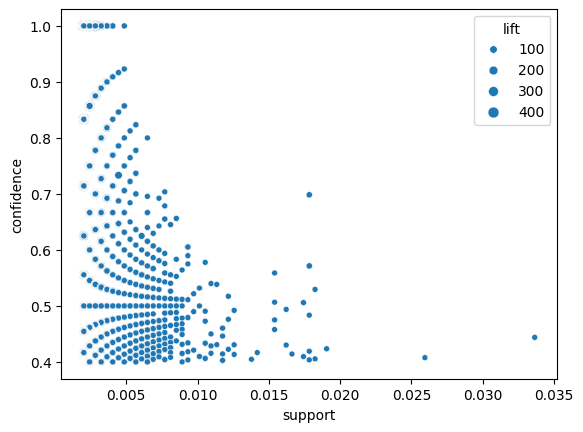

In [ ]:
sns.scatterplot( data = filtered_rules,
                x = 'support',
                y = 'confidence',
                size = 'lift');

In [ ]:
filtered_rules = filtered_rules.sort_values(['confidence', 'lift'], ascending=False)

# Creating a crosstab for each antecedent to consequent with confidence values between them constituting the matrix
rules_crosstab = pd.crosstab(filtered_rules.consequents_desc,
                             filtered_rules.antecedents_desc,
                             values = filtered_rules.confidence,
                             aggfunc = 'max')
rules_crosstab

antecedents_desc,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Avalakki / Poha,Banana,Basmati Rice,Beans,Besan,Boiled Rice,Bread,...,Sugar Cubes,Sunflower Oils,Toilet Cleaners,Tomato Ketchup,Toor Dal,Urad Dal,Vermicelli,Wafers,Whole Spices,Yogurt & Lassi
consequents_desc,,,,,,,,,,,,,,,,,,,,,
Almonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalakki / Poha,NaN,NaN,NaN,1.000,NaN,NaN,NaN,0.500000,NaN,NaN,...,NaN,1.000000,NaN,NaN,1.000000,1.000000,0.600000,NaN,1.000000,NaN
Banana,NaN,NaN,NaN,NaN,NaN,NaN,0.727273,NaN,NaN,0.714286,...,0.416667,NaN,NaN,NaN,NaN,0.555556,NaN,NaN,NaN,NaN
Basmati Rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beans,NaN,NaN,NaN,0.625,0.714286,NaN,1.000000,NaN,0.857143,0.750000,...,NaN,0.833333,NaN,NaN,0.714286,0.714286,NaN,NaN,0.555556,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toor Dal,0.833333,NaN,NaN,1.000,NaN,NaN,0.700000,1.000000,1.000000,0.533333,...,NaN,0.833333,NaN,NaN,NaN,1.000000,0.714286,NaN,1.000000,NaN
Urad Dal,0.833333,0.625000,NaN,1.000,0.428571,NaN,0.416667,0.833333,1.000000,NaN,...,NaN,0.833333,NaN,NaN,1.000000,0.555556,NaN,NaN,1.000000,NaN
Vermicelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


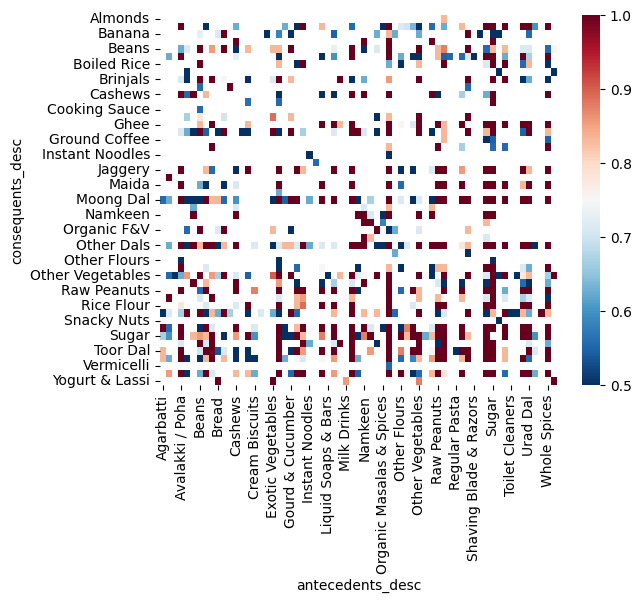

In [ ]:
# Based on the crosstab created above, we visualize the association between the SKUs in the heatmap below
sns.heatmap(rules_crosstab, cmap = 'RdBu_r', vmin=0.5, vmax=1.0);

In [ ]:
# Function to take all SKU combinations to be tested against the association rules' ruleset

def getCombinations(sku_list):
    final_list = []
    
    for r in range(1, len(sku_list) + 1):
        comb_obj = itertools.combinations(sku_list,r)
        comb_list = list(comb_obj)
        final_list.extend(comb_list)
    
    return final_list


# Unique Order Member combinations in test_data
test_orders = last_orders[['Order','Member']].drop_duplicates().reset_index(drop=True)
test_orders



# Driver function for creating the final recommendations based on the last_orders_subset_v1.csv
def getRecsModel1(og_rules, rules, test_orders, last_orders):
    final_recs_list = []
    validating_recs = pd.DataFrame()
    
    # Iterating through the orders in testing data for which we have to provide recommendations
    for index, row in test_orders.iterrows():
        test_order = row['Order']
        test_member = row['Member']
        temp_order = last_orders[last_orders['Order'] == test_order]
        print(f'{index+1}. Collating Recommendations for Order #{test_order}')
        sku_list = temp_order['SKU']
        num_skus = len(sku_list)
        
        # validation_sku_list = [item for item in sku_list if item not in test_sku_list]

        # For each combination of SKUs in sku_list, we look at the rules in our ruleset      
        sku_list_comb = getCombinations(sku_list)

        # Creating a set of test rules from which recommendations will be generated
        test_rules = pd.DataFrame()
        
        test_rules = rules[rules['antecedent_list'].apply(tuple).isin(sku_list_comb)].reset_index()

        fresh_test_rules = test_rules[~test_rules['consequent_list'].isin(sku_list_comb[:num_skus])].reset_index(drop=True)
        fresh_test_rules = fresh_test_rules.drop_duplicates(subset=['consequents'], keep='first').reset_index(drop=True)
        
        # print(fresh_test_rules)
        # print(sku_list_comb)

        # Based on the number of test rules generated on top of the filtered rules created previously, 
        # we will recommend SKUs based off the filtered, better rules first and then the remaining SKUs will be recommended by the unfiltered rules which will provide
        # recommendations with lower confidence values  
        if len(fresh_test_rules[:5]) == 5:
            for idx, trule in fresh_test_rules[:5].iterrows():
                final_recs_list.append({
                    'Member': test_member, 
                    'Order': test_order, 
                    'SKU': list(fresh_test_rules.iloc[idx]['consequent_list']), 
                    # 'confidence': fresh_test_rules.iloc[idx]['confidence']
                    })
        else:
            for idx in range(len(fresh_test_rules)): 
                final_recs_list.append({
                    'Member': test_member, 
                    'Order': test_order, 
                    'SKU': list(fresh_test_rules.iloc[idx]['consequent_list']), 
                    # 'confidence': fresh_test_rules.iloc[idx]['confidence']
                    })
            
                # Creating the set of unfiltered rules from a total of 5 recommendations will be provided
                unfiltered_rules = og_rules[og_rules['antecedent_list'].isin(sku_list_comb[:num_skus])]
                unfiltered_rules = unfiltered_rules[
                    ~unfiltered_rules['consequent_list'].isin(sku_list_comb[:num_skus]) & 
                    ~unfiltered_rules['consequent_list'].isin(fresh_test_rules['consequent_list'])
                ]
                unfiltered_rules = unfiltered_rules.drop_duplicates(subset=['consequents'], keep='first').reset_index(drop=True)
                unfiltered_rules.sort_values(by=['confidence','lift'], ascending=False, inplace=True)
                unfiltered_rules.reset_index(inplace=True)

            if len(fresh_test_rules) + len(unfiltered_rules) >= 5:
                for idx in range(5 - len(fresh_test_rules)):
                    final_recs_list.append({
                        'Member': test_member, 
                        'Order': test_order, 
                        'SKU': list(unfiltered_rules.iloc[idx]['consequent_list']), 
                        #  'confidence': list(unfiltered_rules.iloc[idx]['confidence'])
                        })
            else:
                for idx in range(len(unfiltered_rules)):
                    final_recs_list.append({
                        'Member': test_member, 
                        'Order': test_order, 
                        'SKU': list(unfiltered_rules.iloc[idx]['consequent_list']), 
                        #  'confidence': list(unfiltered_rules.iloc[idx]['confidence'])
                        })
                    

        # for sku in validation_sku_list:
        #     validating_recs = pd.concat([validating_recs, pd.DataFrame({'Member': [test_member], 'Order': [test_order], 'SKU': [sku]})], ignore_index=True)
    
    final_recs = pd.DataFrame(final_recs_list)
    return final_recs

In [ ]:
# Calling the driver function to get a list of recommendation models
recs_model1 = getRecsModel1(rules, filtered_rules, test_orders, last_orders)

# Since multiple consequents can be present from a single rule, we present each consequent in each row
recs_model1 = recs_model1.explode('SKU').reset_index(drop=True)
# Taking the top 5 recommendations per Order
recs_model1 = recs_model1.groupby('Member').head(5).reset_index(drop=True)
# Generating the final set
# recs_model1.to_csv('./GR01_rec_5_sets.csv', index=True)

1. Collating Recommendations for Order #7409204
2. Collating Recommendations for Order #8076206
3. Collating Recommendations for Order #7560723
4. Collating Recommendations for Order #8362837
5. Collating Recommendations for Order #8202458
6. Collating Recommendations for Order #8081317
7. Collating Recommendations for Order #8378408
8. Collating Recommendations for Order #7440894
9. Collating Recommendations for Order #7738863
10. Collating Recommendations for Order #7771136
11. Collating Recommendations for Order #8223433
12. Collating Recommendations for Order #8105205
13. Collating Recommendations for Order #8082175
14. Collating Recommendations for Order #8089212
15. Collating Recommendations for Order #8151550
16. Collating Recommendations for Order #8133840
17. Collating Recommendations for Order #7748353
18. Collating Recommendations for Order #7690884
19. Collating Recommendations for Order #8074318
20. Collating Recommendations for Order #8247009
21. Collating Recommendations